I want to design a function now that can evenly distribute the cards into the deck so there is a diverse array of subject material. I don't have categories for most of the cards. Can I use text clustering to determine the categories and then use those clusters to make a balanced deck?

Yes, you can use text clustering to determine categories for your cards, and then use those clusters to create a balanced deck.

Text clustering involves grouping similar documents together based on their content. There are various algorithms that you can use for text clustering, such as K-Means, Agglomerative Hierarchical Clustering, and DBSCAN.

Once you have grouped your cards into clusters, you can use the number of cards in each cluster to determine the proportion of each cluster that should be included in the deck. For example, if you have 100 cards in total and 20 of them are in cluster A, 40 of them are in cluster B, and the remaining 40 are in cluster C, you might decide to include 20 cards from cluster A, 20 from cluster B, and 10 from cluster C in your deck to achieve a balanced distribution of subject material.

Keep in mind that text clustering can be a complex and time-consuming task, and the quality of the results will depend on the quality of your data and the parameters you choose for the clustering algorithm. You may need to experiment with different approaches and fine-tune your parameters to achieve the best results.

In [55]:
lemmatizing = False
stemming = True
minimum_word_length = 4

In [56]:
import pandas as pd
import json

with open('ppn_deck.json') as f:
    cards = json.load(f)
df = pd.DataFrame(cards)
# drop any rows where the title or summary is null or 'error' and where the text does not contain 'error'
df = df.dropna(subset=['title', 'summary'])
df = df[df['summary'] != 'error']
df = df[df['summary'].str.contains('error') == False]
df = df[df['title'].str.contains('error') == False]

# save the dataframe to the json file
df.to_json('ppn_deck.json', orient='records')


In [57]:
# collect cards and store in a list
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
# Gather all the cards that you want to include in the deck
# read in the ppn_deck.json file
# read in the ppn_deck.json file
import json
with open('ppn_deck.json') as f:
    cards = json.load(f)

# cards = [
#     {"title": "Card 1", "text": "This is the text for card 1"},
#     {"title": "Card 2", "text": "This is the text for card 2"},
#     {"title": "Card 3", "text": "This is the text for card 3"},
# ]

# Preprocess the data by removing irrelevant information
processed_cards = []

# Initialize the stemmer and stopwords
stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

for card in tqdm(cards):
    # Tokenize the text
    tokens = nltk.word_tokenize(str(card["summary"]))
    # lemmatize the tokens
    if lemmatizing:
        filtered_tokens = [lemmatizer.lemmatize(t) for t in tokens]
    else:
        filtered_tokens = tokens
    # Remove any non-alphabetic characters
    filtered_tokens = [re.sub(r'[^a-zA-Z]', '', t) for t in filtered_tokens]
    # Remove words less than 4 characters long
    filtered_tokens = [t for t in filtered_tokens if len(t) > minimum_word_length]
    # Remove stopwords and stem the remaining words
    if stemming:
        filtered_tokens = [stemmer.stem(t) for t in tokens if t not in stopwords]

    # Store the preprocessed data in a new list
    processed_cards.append({"title": str(card["title"]), "summary": filtered_tokens})

# The processed_cards list now contains the preprocessed data
print(processed_cards[0])


100%|██████████| 3723/3723 [00:13<00:00, 286.03it/s]

{'title': 'Michael Buffer', 'summary': ['[', "'michael", 'buffer', "'", ',', "'michael", 'buffer', 'born', 'novemb', '2', ',', '1944', 'american', 'ring', 'announc', 'mc', 'box', ',', 'profession', 'wrestl', ',', 'nation', 'footbal', 'leagu', 'match', '.', 'he', 'known', 'trademark', 'catchphras', ':', 'let', 'get', 'readi', 'rumbl', '!', "'", ']']}


# TFIDF Vectorizer

In [58]:
# using the tfidf vectorizer to create a vector for each card from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a list of documents
documents = []
for card in processed_cards:
    documents.append(" ".join(card["summary"]))

# print the documents list
print(documents[0])

[ 'michael buffer ' , 'michael buffer born novemb 2 , 1944 american ring announc mc box , profession wrestl , nation footbal leagu match . he known trademark catchphras : let get readi rumbl ! ' ]


In [59]:

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Use the fit_transform method to calculate the TF-IDF values for each word
try:
    X = vectorizer.fit_transform(documents)
except ValueError as e:
    print("Error! The vectorizer was unable to process the data")
    print(e)

This will create a sparse matrix X that contains the TF-IDF values for each word in each document. The rows represent the documents and the columns represent the words.

You can then use this matrix as input to a machine learning algorithm to perform text clustering.

Once you have collected and preprocessed the data, the next step would be to create a document-term matrix (DTM) from the preprocessed data. A document-term matrix is a matrix where each row represents a document (in this case, a card), and each column represents a term (a word or phrase) in the vocabulary. The entries in the matrix indicate the frequency with which each term appears in each document.

To create a document-term matrix, you can use a tool such as the TfidfVectorizer from the sklearn library. This tool allows you to specify the minimum and maximum number of times a term must appear in the documents to be included in the vocabulary, as well as the maximum number of terms to include in the vocabulary.

Once you have created the document-term matrix, you can then use it as input to a clustering algorithm, such as K-Means, to identify clusters of similar documents. You can then use these clusters to evenly distribute the cards into the deck.

Here is an example of how you might create a document-term matrix using the TfidfVectorizer and cluster the documents using K-Means:

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Cluster the documents using K-Means
km = KMeans(n_clusters=10, random_state=0)
km.fit(X)

# Assign each card to a cluster
clusters = km.labels_.tolist()
for i, cluster in enumerate(clusters):
    cards[i]["cluster"] = cluster

# The cards list now contains the cluster assignment for each card
print(cards[0]) # Print the first 10 cards


{'title': 'Michael Buffer', 'summary': "['Michael Buffer', 'Michael Buffer born November 2, 1944 is an American ring announcer or MC for boxing, professional wrestling, and National Football League matches. He is known for his trademarked catchphrase: Lets get ready to rumble!']", 'related': 174, 'point_value': 174, 'grade_level': 9.1, 'summary_length': 239, 'points_for_card': 1.0, 'acronym': False, 'years_in_summary': 1, 'years_in_title': 0, 'points_by_year_mentioned': 1, 'summary_short': "['Michael Buffer', 'Michael Buffer born November 2, 1944 is an American ring announcer or MC for boxing, professional wrestling, and National Football League matches.He is known for his trademarked catchphrase: Lets get ready to rumble!']", 'cluster': 6}


In [61]:
# print the clusters and their value_counts in the df

import pandas as pd
df = pd.DataFrame(cards)
df.head(10)

,title,summary,related,point_value,grade_level,summary_length,points_for_card,acronym,years_in_summary,years_in_title,points_by_year_mentioned,summary_short,cluster
0,Michael Buffer,"['Michael Buffer', 'Michael Buffer born Novemb...",174,174,9.1,239,1.0,False,1,0,1,"['Michael Buffer', 'Michael Buffer born Novemb...",6
1,Kwang Soo Kim,"['Kwang Soo Kim', 'Kwang Soo Kim, Kwang Soo Ki...",53,53,11.1,758,6.0,False,5,0,2,"('Kwang Soo Kim', 'Kwang Soo Kim, Kwang Soo Ki...",6
2,Fame in the 20th Century,"['Fame in the 20th Century', 'Fame in the 20th...",591,591,10.8,1178,6.0,False,4,0,2,"('Fame in the 20th Century', 'Fame in the 20th...",8
3,Lock of hair,"['Lock of hair', 'Lock of hair, A lock of hair...",247,247,8.9,275,1.0,False,0,0,1,"('Lock of hair', 'Lock of hair, A lock of hair...",6
4,Johnny Depp,"['Johnny Depp', 'Johnny Depp, John Christopher...",875,875,12.8,2752,6.0,False,36,0,2,"('Johnny Depp', 'Johnny Depp, John Christopher...",3
5,Normative social influence,"['Normative social influence', 'Normative soci...",119,119,12.4,1340,5.0,False,0,0,1,"('Normative social influence', 'Normative soci...",2
6,Simone de Beauvoir,"['Simone de Beauvoir', 'Simone de Beauvoir, Si...",980,980,13.3,1178,6.0,False,9,0,2,"('Simone de Beauvoir', 'Simone de Beauvoir, Si...",5
7,William J. Dominik,"['William J. Dominik', 'William J. Dominik, Wi...",43,43,10.1,325,6.0,False,3,0,2,"('William J. Dominik', 'William J. Dominik, Wi...",6
8,Lofi hip hop,"['Lofi hip hop', 'Lofi hip hop, Lofi hip hop a...",595,595,9.7,269,3.0,False,1,0,2,"('Lofi hip hop', 'Lofi hip hop, Lofi hip hop a...",2
9,Candle Cove,"['Candle Cove', 'Candle Cove, Candle Cove is a...",14,14,13.6,1229,6.0,False,3,0,2,"('Candle Cove', 'Candle Cove, Candle Cove is a...",8


In [62]:
# !pip install seaborn

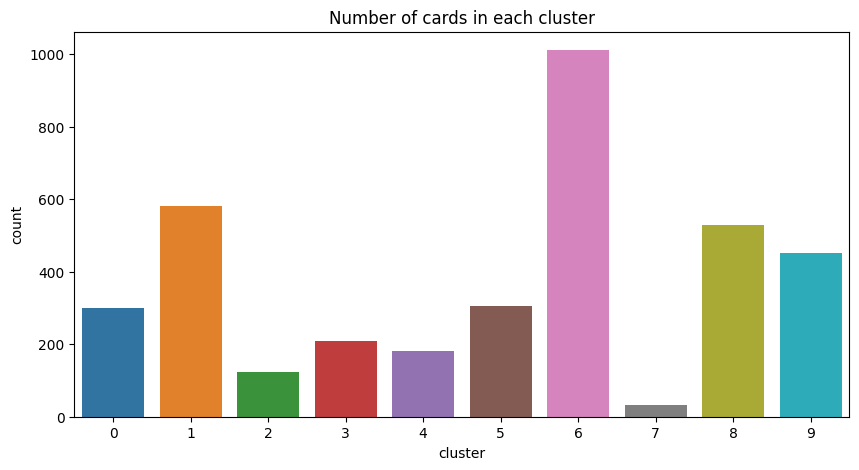

In [63]:
# visualize the clusters
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(cards)
%matplotlib inline
plt.figure(figsize=(10, 5))
sns.countplot(x="cluster", data=df)
plt.title("Number of cards in each cluster")
plt.show()


# ---

In [64]:
max_clusters = 15 # The maximum number of clusters to try (categories)

In [65]:
from sklearn.metrics import silhouette_score
import numpy as np
# Initialize an empty list to store the silhouette scores
scores = []

# Iterate over a range of possible number of clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # Run the k-means clustering algorithm with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X)
    # Calculate the silhouette score for the current clusters
    score = silhouette_score(X, cluster_labels)
    # Add the score to the list of scores
    scores.append(score)

# Find the number of clusters that resulted in the highest silhouette score
best_n_clusters = np.argmax(scores) + 2

# Re-run the k-means clustering algorithm with the best number of clusters
kmeans = KMeans(n_clusters=best_n_clusters)
cluster_labels = kmeans.fit_predict(X)


  7%|▋         | 1/14 [00:00<00:11,  1.11it/s]

# Perform k-means clustering with the best number of clusters
km = KMeans(n_clusters=best_n_clusters)
cluster_labels = km.fit_predict(tfidf_matrix)


In [ ]:
# Perform k-means clustering with the best number of clusters
km = KMeans(n_clusters=best_n_clusters)
tfidf_matrix = vectorizer.fit_transform(documents)
cluster_labels = km.fit_predict(tfidf_matrix)
print("Number of clusters:", best_n_clusters)
print(f'cluster labels {cluster_labels}')
# Assign each card to a cluster
clusters = km.labels_.tolist()
for i, cluster in enumerate(clusters):
    cards[i]["cluster"] = cluster # The cards list now contains the cluster assignment for each card

Number of clusters: 15
cluster labels [14  9  1 ...  3  3  9]


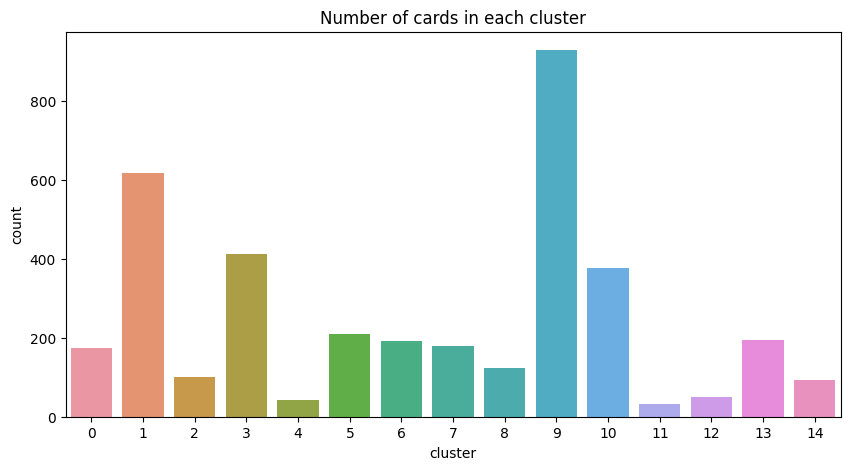

In [ ]:
# visualize the clusters
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(cards)
%matplotlib inline
plt.figure(figsize=(10, 5))
sns.countplot(x="cluster", data=df)
plt.title("Number of cards in each cluster")
plt.show()

number_of_clusters = len(set(clusters))


In [ ]:
# show the top five cards in the cluster with the most rows in the df (i.e. the cluster with the most cards)
df = pd.DataFrame(cards)
cluster_with_most = df['cluster'].value_counts().index[0]
df[df['cluster'] == cluster_with_most].head(5)

,title,summary,related,point_value,grade_level,summary_length,points_for_card,acronym,years_in_summary,years_in_title,points_by_year_mentioned,summary_short,cluster
1,Kwang Soo Kim,"['Kwang Soo Kim', 'Kwang Soo Kim, Kwang Soo Ki...",53,53,11.1,758,6.0,False,5,0,2,"('Kwang Soo Kim', 'Kwang Soo Kim, Kwang Soo Ki...",9
5,Normative social influence,"['Normative social influence', 'Normative soci...",119,119,12.4,1340,5.0,False,0,0,1,"('Normative social influence', 'Normative soci...",9
6,Simone de Beauvoir,"['Simone de Beauvoir', 'Simone de Beauvoir, Si...",980,980,13.3,1178,6.0,False,9,0,2,"('Simone de Beauvoir', 'Simone de Beauvoir, Si...",9
7,William J. Dominik,"['William J. Dominik', 'William J. Dominik, Wi...",43,43,10.1,325,6.0,False,3,0,2,"('William J. Dominik', 'William J. Dominik, Wi...",9
15,Against Therapy,"['Against Therapy', 'Against Therapy, Against ...",101,101,12.1,268,6.0,False,1,0,2,"('Against Therapy', 'Against Therapy, Against ...",9


In [ ]:
# show the top two full summaries of the top two cards in the cluster with the most rows in the df (i.e. the cluster with the most cards)
df = pd.DataFrame(cards)
cluster_with_most = df['cluster'].value_counts().index[0]
df[df['cluster'] == cluster_with_most].head(2)['summary']


1    ['Kwang Soo Kim', 'Kwang Soo Kim, Kwang Soo Ki...
5    ['Normative social influence', 'Normative soci...
Name: summary, dtype: object

In [ ]:
# Randomly sample the cards from each cluster to add to a new deck of cards that has at most the same number of cards as the smallest cluster
import random
def balance_the_deck_by_cluster(deck_df):
    # Find the smallest cluster
    min_cluster_size = min(df["cluster"].value_counts())
    # Create a new list to store the new deck of cards
    new_deck = []
    # Randomly sample the cards from each cluster
    for cluster in range(number_of_clusters):
        new_deck.extend(random.sample(list(df[df["cluster"] == cluster].to_dict("records")), min_cluster_size))
    return new_deck # Return the new deck of cards


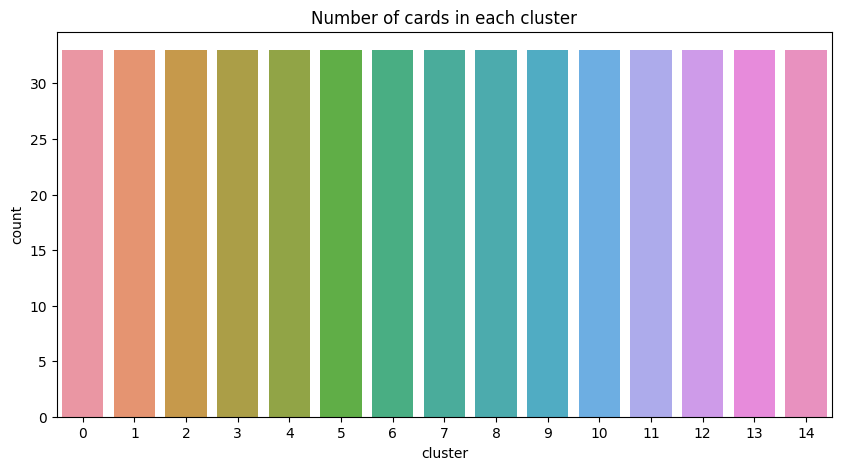

In [ ]:
# show the distribution of the new deck (clusters)
# visualize the clusters
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
new_deck = balance_the_deck_by_cluster(df)
new_deck = pd.DataFrame(new_deck)
plt.figure(figsize=(10, 5))
sns.countplot(x="cluster", data=new_deck)
plt.title("Number of cards in each cluster")
plt.show()

In [ ]:
# Get the cluster labels for each card
cluster_labels = km.labels_

# Initialize a list to store the top 10 words for each cluster
top_words = []

# Iterate over each cluster
for i in range(number_of_clusters):
    # Get the indices of the cards in this cluster
    cluster_indices = [j for j, label in enumerate(cluster_labels) if label == i]

    # Get the tf-idf values for each word in this cluster
    cluster_tfidf = X[cluster_indices]

    # Get the sum of the tf-idf values for each word
    word_tfidf_sums = cluster_tfidf.sum(axis=0)

    # Convert the sums to a dense array
    word_tfidf_sums = cluster_tfidf.sum(axis=0).tolist()[0]

    # Get the indices of the words with the highest tf-idf values
    sorted_tfidf_indices = sorted(range(len(word_tfidf_sums)), key=lambda i: word_tfidf_sums[i], reverse=True)

    # Get the top 10 words
    top_10_words = [vectorizer.get_feature_names()[i] for i in sorted_tfidf_indices[:10]]

    # Add the top 10 words to the list
    top_words.append(top_10_words)


/opt/anaconda3/envs/groupme/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Print the top 10 words for each cluster
for i, top_words in enumerate(top_words):
    print("Cluster {}: {}".format(i, ", ".join(top_words)))


Cluster 0: war, melon, ocean, world, state, presid, period, the, unit, lake
Cluster 1: seri, charact, televis, the, show, fiction, anim, portray, appear, he
Cluster 2: jack, mytholog, person, use, artist, attach, term, often, refer, speech
Cluster 3: charact, soap, role, opera, storylin, appear, fiction, she, portray, return
Cluster 4: doctor, who, companion, seri, scienc, charact, fiction, the, appear, british
Cluster 5: film, star, the, award, best, direct, american, academi, actor, pictur
Cluster 6: soap, opera, charact, play, fiction, appear, screen, emmerdal, made, eastend
Cluster 7: season, seri, trek, episod, charact, star, the, appear, fiction, portray
Cluster 8: music, video, meme, internet, youtub, popular, the, viral, rock, record
Cluster 9: the, he, it, born, state, known, law, also, in, american
Cluster 10: use, the, phrase, it, term, mean, english, word, fabl, languag
Cluster 11: tree, crown, cherri, plant, fruit, branch, peac, wood, use, pollard
Cluster 12: comic, marvel

In [ ]:

import random

def generate_random_html_color():
    """
    Generate a random HTML-compatible color.
    """
    # Generate a random number between 0 and 255 for each color channel (red, green, blue)
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    # Return the color as a string in the format "#RRGGBB"
    return "#{:02x}{:02x}{:02x}".format(r, g, b)

# Generate a random HTML-compatible color
color = generate_random_html_color()
print(color)


#8166dd


In [ ]:
# Generate a list of random HTML-compatible colors for each cluster
colors = {
    '1': generate_random_html_color()
}

for cluster in range(number_of_clusters):
    colors[cluster] = generate_random_html_color()

# now apply these colors to the card dataframe where the cluster is the key and the color is the value in the colors dictionary
df['color'] = df['cluster'].map(colors)

# The colors list now contains a random HTML-compatible color for each cluster
print(colors)
# save the dataframe to the json file
df.to_json('cards.json', orient='records')

[]


In [ ]:
def category_filtering(top_ten_words,categories,colors):
    # I want to add a check to be sure there are no duplicated mode words and then assign those words as the cluster names which will eventually be the categories on the cards.
    # Initialize an empty list mode_words to store the mode words for each cluster.
    # Iterate through each cluster:
    # Initialize an empty list words to store the words for this cluster.
    # Iterate through each card in the cluster:
    # Get the title and summary text of the card.
    # Preprocess the text by removing stopwords, punctuation, and words that are less than 4 characters long.
    # Add the filtered tokens to the list of words.
    # Find the word with the highest frequency in the list of words.
    # Check if the mode word is already in the list of mode words. If it is, generate a new word by concatenating the mode word with the cluster number (e.g. "word1_1" for the first cluster).
    # Add the mode word to the list of mode words.
    # The list mode_words now contains the unique mode words for each cluster, which can be used as the cluster names.
    
    # going from most frequent to least frequent in top_ten_words list pick the first noun that is not already in the categories list as the cluster's name and add it to the categories list.
    # if there are no nouns in the top_ten_words list then pick the first word that is not already in the categories list as the cluster's name and add it to the categories list.
    # else throw an error

    # Initialize an empty list mode_words to store the mode words for each cluster.
    mode_words = []
    existing_categories = categories.copy() # from the passed argument above.
    # Iterate through each cluster:
    for i, word in enumerate(top_ten_words):
        # top words already has the top ten words for each cluster so we can just iterate through that list
        if word in categories:
            # if the word is already in the categories list then we don't want to add it again
            continue
        else:
            #* the word is new
            # now check if it is a noun with nltk pos_tag
            token = nltk.word_tokenize(word)
            pos = nltk.pos_tag(token) # returns a list of tuples
            if pos[0][1] in ['NN','NNS','NNP','NNPS']: # if the first word in the tuple is a noun then we can add it to the categories list
                categories.append(word)
                mode_words.append(word)
                break
            else:
                continue

def define_category(top_ten_words, categories):
    """
    get_categories is a function that takes in the top ten words for each cluster and returns a set of the nouns in the top ten words.
    :param top_ten_words: the top ten words for this cluster as a list (cluster is a category)
    :type top_ten_words: a list of strings
    :return: a single category name for this cluster that is a noun and unique in the categories list   
    :rtype: a string
    """
    # the top_ten_words is a list of tuples, the first is a word and the second is the tf-idf value
    top_ten_strings = [word[0] for word in top_ten_words] # get the first element of each tuple in the list
    for word in top_ten_strings:
        token = nltk.word_tokenize(str(word)) # tokenize the word
        pos = nltk.pos_tag(token) # get the part of speech for the word
        if pos[0][1] in ['NN','NNS','NNP','NNPS']: # if the first word in the tuple is a noun then we can add it to the categories list
            if str(word).lower() not in categories: # if the word is not already in the categories list then we can add it
                categories.append(str(word).lower()) # add the word to the set of categories
                return str(word).lower() # return the word as the category name
    else:
        return 'mystery', categories

# now get the mode of each cluster (by looking at the combination of title and summary text words without lemmatizing or stemming) after removal of stopwords, punctuation, and words less than 4 characters long and show the mode word for each cluster.
# Initialize an empty list to store the mode words
mode_words = []
categories = [] # initialize an empty list to store the categories
print(len(clusters), " There are this many clusters")
# Iterate through each cluster
for cluster_id in range(len(clusters)):
    # Initialize an empty list to store the words for this cluster
    words = []
    cluster = [cards[i] for i, label in enumerate(cluster_labels) if label == cluster_id]
    # Iterate through each card in the cluster
    print("Cluster {} has {} cards".format(cluster_id, len(cluster)))
    for card in cluster:
        # Get the title and summary text of the card
        text = str(card["title"]) + " " + str(card["summary"])
        # Preprocess the text
        # Remove stopwords, punctuation, and words that are less

        # Remove stopwords, punctuation, and words thaat are less than 4 characters long
        tokens = nltk.word_tokenize(text)
        filtered_tokens = [t for t in tokens if t not in stopwords and t.isalpha() and len(t) >= 4]
        # Add the filtered tokens to the list of words
        words.extend(filtered_tokens)
    
    if words:
        word_counts = nltk.FreqDist(words)
        # get the top 10 most common words
        top_ten = word_counts.most_common(10) # returns a list of tuples, each tuple is a word and its count
        # if the top word is "also" then use the second most common word
        category, categories = define_category(top_ten, categories) # returns a string of the category name for this cluster
    else:
        break

# The mode_words list now contains the mode word for each cluster
print(categories)
print(f'The length of the categories list is {len(categories)}, which should be the same as the number of clusters: {len(clusters)}')


3723  There are this many clusters
Cluster 0 has 175 cards


ValueError: too many values to unpack (expected 2)

In [ ]:
# now get the mode of each cluster (by looking at the combination of title and summary text words without lemmatizing or stemming) after removal of stopwords, punctuation, and words less than 4 characters long and show the mode word for each cluster.
# Initialize an empty list to store the mode words
mode_words = []
categories = [] # initialize an empty list to store the categories
print(len(clusters), " There are this many clusters")
# Iterate through each cluster
for cluster_id in range(len(clusters)):
    # Initialize an empty list to store the words for this cluster
    words = []
    cluster = [cards[i] for i, label in enumerate(cluster_labels) if label == cluster_id]
    # Iterate through each card in the cluster
    print("Cluster {} has {} cards".format(cluster_id, len(cluster)))
    for card in cluster:
        # Get the title and summary text of the card
        text = str(card["title"]) + " " + str(card["summary"])
        # Preprocess the text
        # Remove stopwords, punctuation, and words that are less

        # Remove stopwords, punctuation, and words thaat are less than 4 characters long
        tokens = nltk.word_tokenize(text)
        filtered_tokens = [t for t in tokens if t not in stopwords and t.isalpha() and len(t) >= 4]
        # Add the filtered tokens to the list of words
        words.extend(filtered_tokens)
    
    if words:
        word_counts = nltk.FreqDist(words)
        # get the top 10 most common words
        top_ten = word_counts.most_common(10) # returns a list of tuples, each tuple is a word and its count
        # if the top word is "also" then use the second most common word
        category, categories = define_category(top_ten, categories) # returns a string of the category name for this cluster
    else:
        break

# The mode_words list now contains the mode word for each cluster
print(categories)
print(f'The length of the categories list is {len(categories)}, which should be the same as the number of clusters: {len(clusters)}')

